In [ ]:
import os

In [ ]:
data_dir="/kaggle/input/new-data-vehicle-classification/NewData"

In [ ]:
def check_files(data_dir):
      for cl in os.listdir(data_dir):
        images=len(os.listdir(data_dir+'/'+cl))
        print(f"Number of images in {cl} directory is {images} image.")

In [ ]:
check_files(data_dir)

Number of images in Motorcycle directory is 329 image.
Number of images in large_truck directory is 340 image.
Number of images in bus directory is 331 image.
Number of images in truck directory is 307 image.
Number of images in microbus directory is 319 image.
Number of images in car directory is 383 image.
Number of images in semi_truck directory is 322 image.


In [ ]:
!mkdir train
!mkdir test
!mkdir val

In [ ]:
import random
import shutil

train_percent = 0.7
val_percent = 0.2
test_percent = 0.1

# Set the paths for the output train, validation, and test directories
train_dir = "/kaggle/working/train"
val_dir = "/kaggle/working/val"
test_dir ="/kaggle/working/test"

# Loop through each subfolder in the data directory
for subfolder_name in os.listdir(data_dir):
    subfolder_path = os.path.join(data_dir, subfolder_name)

    # Ignore any files in the data directory
    if not os.path.isdir(subfolder_path):
        continue

    # Create the output train, validation, and test subdirectories for this class
    train_subfolder = os.path.join(train_dir, subfolder_name)
    val_subfolder = os.path.join(val_dir, subfolder_name)
    test_subfolder = os.path.join(test_dir, subfolder_name)
    os.makedirs(train_subfolder, exist_ok=True)
    os.makedirs(val_subfolder, exist_ok=True)
    os.makedirs(test_subfolder, exist_ok=True)

    # Get the list of image files in this subfolder
    images = os.listdir(subfolder_path)
    random.shuffle(images)

    # Split the images into train, validation, and test sets
    num_images = len(images)
    num_train = int(num_images * train_percent)
    num_val = int(num_images * val_percent)
    num_test = int(num_images * test_percent)

    train_images = images[:num_train]
    val_images = images[num_train:num_train+num_val]
    test_images = images[num_train+num_val:]

    # Copy the image files to the appropriate output directories
    for image in train_images:
        src_path = os.path.join(subfolder_path, image)
        dst_path = os.path.join(train_subfolder, image)
        shutil.copy(src_path, dst_path)

    for image in val_images:
        src_path = os.path.join(subfolder_path, image)
        dst_path = os.path.join(val_subfolder, image)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(subfolder_path, image)
        dst_path = os.path.join(test_subfolder, image)
        shutil.copy(src_path, dst_path)


In [ ]:
check_files(train_dir)

Number of images in Motorcycle directory is 230 image.
Number of images in truck directory is 214 image.
Number of images in car directory is 268 image.
Number of images in semi_truck directory is 225 image.
Number of images in large_truck directory is 237 image.
Number of images in bus directory is 231 image.
Number of images in microbus directory is 223 image.


In [ ]:
check_files(val_dir)

Number of images in Motorcycle directory is 65 image.
Number of images in truck directory is 61 image.
Number of images in car directory is 76 image.
Number of images in semi_truck directory is 64 image.
Number of images in large_truck directory is 68 image.
Number of images in bus directory is 66 image.
Number of images in microbus directory is 63 image.


In [ ]:
check_files(test_dir)

Number of images in Motorcycle directory is 34 image.
Number of images in truck directory is 32 image.
Number of images in car directory is 39 image.
Number of images in semi_truck directory is 33 image.
Number of images in large_truck directory is 35 image.
Number of images in bus directory is 34 image.
Number of images in microbus directory is 33 image.


In [ ]:
#/content/train/Motorcycle/000001_15.jpg

In [ ]:
def create_annotations(image_dir):
    idx=-1
    for sub in os.listdir(image_dir):
        idx+=1
        for filename in os.listdir(image_dir+'/'+sub):
            if filename.endswith('.jpg'):
                # Get the basename of the image file (without the extension)
                basename = os.path.splitext(filename)[0]
                # Open the corresponding annotation file in write mode
                with open(os.path.join(image_dir+'/'+sub, basename + '.txt'), 'w') as f:
                    # Write the class index to the file in YOLO format
                    f.write(f"{str(idx)} 0.5 0.5 1.0 1.0")


In [ ]:
create_annotations(train_dir)

In [ ]:
create_annotations(val_dir)

In [ ]:
create_annotations(test_dir)

In [ ]:
check_files(test_dir)

Number of images in Motorcycle directory is 68 image.
Number of images in truck directory is 64 image.
Number of images in car directory is 76 image.
Number of images in semi_truck directory is 66 image.
Number of images in large_truck directory is 70 image.
Number of images in bus directory is 68 image.
Number of images in microbus directory is 66 image.


In [ ]:
yml_classes=os.listdir(train_dir)
yml_classes

['Motorcycle', 'truck', 'car', 'semi_truck', 'large_truck', 'bus', 'microbus']

# Create the data.yaml file contains the below and upload it :
train: /kaggle/working/train

val: /kaggle/working/val

nc: 7

names: yml_classes


In [ ]:
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.41 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (486/486), done.
/kaggle/working/yolov7
Note: you may need to restart the kernel to use updated packages.
/kaggle/working
Setup complete. Using torch 1.13.0 (Tesla P100-PCIE-16GB)


In [ ]:
%cd yolov7

/kaggle/working/yolov7


In [ ]:
os.listdir("/kaggle/working/yolov7")

['tools',
 'paper',
 'scripts',
 'train_aux.py',
 '.git',
 '.gitignore',
 'export.py',
 'utils',
 'README.md',
 'deploy',
 'test.py',
 'train.py',
 'data',
 'detect.py',
 'cfg',
 'inference',
 'figure',
 'LICENSE.md',
 'hubconf.py',
 'requirements.txt',
 'models']

In [ ]:
import yaml

data = {
    "train": "/kaggle/working/train",
    "val": "/kaggle/working/val",
    "nc": 7,
    "names":yml_classes
}

with open("/kaggle/working/yolov7/data/data.yaml", "w") as f:
    yaml.dump(data, f)


In [ ]:
!wandb disabled
!python train.py --img 288 --batch 64 --epochs 100 --data data.yaml  --weights 'yolov7.pt'

W&B disabled.
100%|███████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 171MB/s]

/opt/conda/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
train: Scanning '/kaggle/working/train/Motorcycle' images and labels... 1618 fou
val: Scanning '/kaggle/working/val/Motorcycle' images and labels... 459 found, 4

autoanchor: Analyzing anchors... anchors/target = 4.02, Best Possible Recall (BPR) = 1.0000
      0/99     9.38G    0.0685  0.007961    0.0339    0.1104        90       288
               Class      Images      Labels           P           R      mAP@.5
                 all         463         459      0.0453        0.12      0.0378      0.0126
      1/99     9.34G   0.05398   0.01008   0.03185   0.09591   

In [ ]:
os.listdir('/kaggle/working/yolov7/runs/train/exp')

['train_batch1.jpg',
 'train_batch5.jpg',
 'R_curve.png',
 'hyp.yaml',
 'opt.yaml',
 'train_batch6.jpg',
 'test_batch2_labels.jpg',
 'events.out.tfevents.1681770012.b38111df346c.102.0',
 'test_batch0_labels.jpg',
 'PR_curve.png',
 'weights',
 'train_batch3.jpg',
 'F1_curve.png',
 'test_batch1_pred.jpg',
 'train_batch0.jpg',
 'train_batch7.jpg',
 'train_batch8.jpg',
 'test_batch2_pred.jpg',
 'confusion_matrix.png',
 'P_curve.png',
 'results.txt',
 'test_batch1_labels.jpg',
 'results.png',
 'train_batch2.jpg',
 'train_batch4.jpg',
 'test_batch0_pred.jpg',
 'train_batch9.jpg']

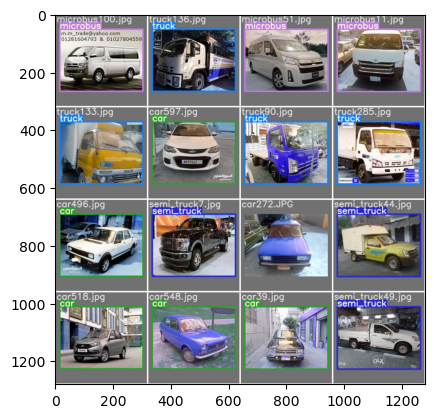

In [ ]:
from matplotlib import pyplot as plt
import cv2 as cv
img = cv.imread('/kaggle/working/yolov7/runs/train/exp/test_batch2_labels.jpg')
plt.imshow(img);

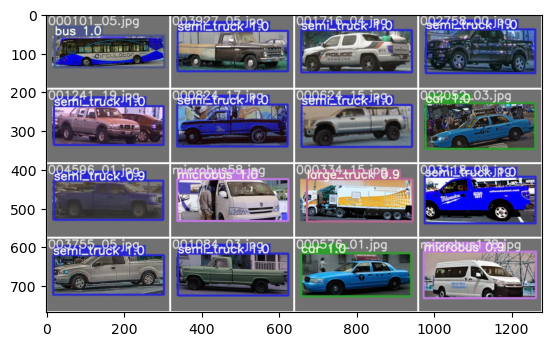

In [ ]:
img = cv.imread('/kaggle/working/yolov7/runs/train/exp/test_batch0_pred.jpg')
plt.imshow(img);

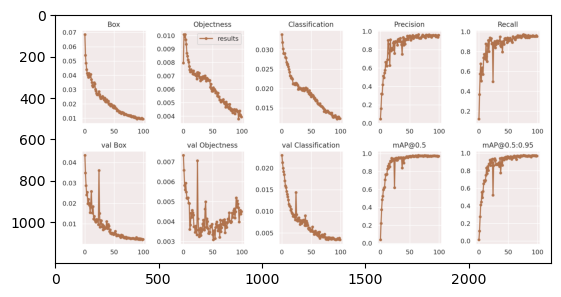

In [ ]:
img = cv.imread('/kaggle/working/yolov7/runs/train/exp/results.png')
plt.imshow(img);

In [ ]:
import yaml

data = {
    "train": "/kaggle/working/train",
    "val": "/kaggle/working/test",
    "nc": 7,
    "names":yml_classes
}

with open("/kaggle/working/yolov7/data/data_test.yaml", "w") as f:
    yaml.dump(data, f)


In [ ]:
!python test.py --weights /kaggle/working/yolov7/runs/train/exp/weights/best.pt --data /kaggle/input/datadotyaml/data.yaml --img 288

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/kaggle/input/datadotyaml/data.yaml', device='', exist_ok=False, img_size=288, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/kaggle/working/yolov7/runs/train/exp/weights/best.pt'])
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/opt/conda/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

val: Scanning '/kaggle/working/val/Motorcycle.cache' images and labels... 459 fo
 

In [ ]:
!pip --quiet install onnx onnxruntime onnxsim
!pip install onnx-tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
!python export.py --weights /kaggle/working/yolov7/runs/train/exp/weights/best.pt --grid --end2end --simplify \
--topk-all 100 --iou-thres 0.5 --conf-thres 0.35 --img-size 288 288 --max-wh 288

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(batch_size=1, conf_thres=0.35, device='cpu', dynamic=False, dynamic_batch=False, end2end=True, fp16=False, grid=True, img_size=[288, 288], include_nms=False, int8=False, iou_thres=0.5, max_wh=288, simplify=True, topk_all=100, weights='/kaggle/working/yolov7/runs/train/exp/weights/best.pt')
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/opt/conda/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

Starting TorchScript export with torch 1.13.0...
/kaggle/working/yolov7/models/yolo.py:52: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record 

In [ ]:
yml_classes

['Motorcycle', 'truck', 'car', 'semi_truck', 'large_truck', 'bus', 'microbus']

In [ ]:
# Inference for ONNX model
#Importing necessary libraries.
import cv2
import time
import requests
import random
import numpy as np
import onnxruntime as ort
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple
import matplotlib.pyplot as plt
cuda = False
w = "/kaggle/working/yolov7/runs/train/exp/weights/best.onnx"
#Loading image for testing.
#img = cv2.imread("/kaggle/working/test/Motorcycle/004564_18.jpg")


In [ ]:
#Loading the ONNX inference session.
providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if cuda else ['CPUExecutionProvider']
session = ort.InferenceSession(w, providers=providers)


def letterbox(im, new_shape=(288, 288), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

#Name of the classes according to class indices.
names = yml_classes

#Creating random colors for bounding box visualization.
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

In [ ]:
result={'car':0,'microbus':0,'truck':0,'bus':0,'large_truck':0,'Motorcycle':0,'semi_truck':0}

In [ ]:
test_path="/kaggle/working/test/"
for clas in yml_classes:
    path=str(test_path+clas+'/')
    for image in os.listdir(path):
        if image.split('.')[-1]=='txt':
            continue
        img = cv2.imread(str(path+image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #Preprocessing the image for prediction.
        image = img.copy()
        image, ratio, dwdh = letterbox(image, auto=False)
        image = image.transpose((2, 0, 1))
        image = np.expand_dims(image, 0)
        image = np.ascontiguousarray(image)

        im = image.astype(np.float32)
        im /= 255
        im.shape

        #Getting onnx graph input and output names.
        outname = [i.name for i in session.get_outputs()]
        inname = [i.name for i in session.get_inputs()]
        inp = {inname[0]:im}

        # Running inference using session.
        outputs = session.run(outname, inp)[0]


        ori_images = [img.copy()]

        #Visualizing bounding box prediction.
        for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(outputs):
            image = ori_images[int(batch_id)]
            box = np.array([x0,y0,x1,y1])
            box -= np.array(dwdh*2)
            box /= ratio
            box = box.round().astype(np.int32).tolist()
            cls_id = int(cls_id)
            score = round(float(score),3)
            name = names[cls_id]
            if name==clas:
                result[clas]+=1
            color = colors[name]
            name += ' '+str(score)
    print(f"{clas} = {result[clas]}")

Motorcycle = 34
truck = 26
car = 39
semi_truck = 28
large_truck = 32
bus = 34
microbus = 32


In [ ]:
allResults=0
for cl in result:
    allResults+=result[cl]
allImages=0
for clas in os.listdir(test_path):
    if clas =='truck':
        continue
    allImages+=len(os.listdir(str(test_path+clas)))/2
print(f"Accuracy without truck = {allResults/allImages}")

Accuracy without truck = 1.0869565217391304


In [ ]:
allImages=0
for clas in os.listdir(test_path):
    allImages+=len(os.listdir(str(test_path+clas)))/2
print(f"Accuracy with truck = {allResults/allImages}")

Accuracy with truck = 0.9414225941422594
